# Analiza pliku z danymi dot. pasażerów Titanica

## Wstęp
W tym notebooku przejdziemy przez zestaw danych Titanic i przewidzimy, czy osoba przeżyła katastrofę statku.

Plan działania:
1. Zdefiniowanie pytania lub problemu.
2. Pozyskanie danych treningowych i testowych.
3. Opracowanie, przygotowanie, oczyszczenie danych.
4. Analiza, identyfikacja wzorców i eksploracja danych.
5. Modelowanie, przewidywanie i rozwiązywanie problemu.
6. Wizualizacja, raportowanie i prezentacja kroków rozwiązywania problemu i ostatecznego rozwiązania.
7. Dostarczanie lub przekazywanie wyników.

Cele:
- **Klasyfikacja** i kategoryzacja danych
- **Badanie korelacji** - Można podejść do problemu na podstawie dostępnych cech w zbiorze danych treningowych. Zdecydujemy które cechy w zbiorze danych przyczyniają się znacząco do naszego celu rozwiązania. Czy statystycznie rzecz biorąc istnieje korelacja pomiędzy cechą a przeżywalnością?
- **Modelowanie** - Możliwa jest konieczność przekształcenia danych tekstowych na liczbowe.
- **Brakujące dane** - Ocenimy brakujące wartości w ramach danej cechy i podejmiemy decyzję dot. dalszego działania.
- **Korekty** - Przeanalizujemy dane pod kątem niedokładności szukając jakichkolwiek wartości odstających wśród naszych próbek. Możliwe jest wykluczenie cechy jeśli nie wnosi nic do analizy.
- **Tworzenie** - Zastanowimy się czy możemy stworzyć nowe cechy na podstawie istniejących.
- **Wizualizacja** - Dobierzemy odpowiednie wykresy do charakteru danych.

## 1. Zdefiniowanie pytania lub problemu.

- 15 kwietnia 1912 roku, podczas swojego dziewiczego rejsu, Titanic zatonął po zderzeniu z górą lodową, zabijając 1502 z 2224 pasażerów i załogi. Przekładając to na 32% wskaźnik przeżywalności.
- Jednym z powodów, dla których katastrofa statku doprowadziła do takiej utraty życia, było to, że nie było wystarczającej liczby łodzi ratunkowych dla pasażerów i załogi.
- Chociaż istniał pewien element szczęścia związany z przeżyciem zatonięcia, niektóre grupy ludzi miały większe szanse na przeżycie niż inne, takie jak kobiety, dzieci i klasa wyższa.

Pytanie badawcze: *Jakiego rodzaju ludzie mieli większe szanse na przeżycie?*

In [2]:
# analiza, obróbka i wizualizacja danych
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import random as rnd

# uczenie maszynowe
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## 2. Pozyskanie danych treningowych i testowych.


In [45]:
train_df = pd.read_csv(r"data\train.csv") # dane treningowe
test_df = pd.read_csv(r"data\test.csv") # dane testowe
titanic_data = [train_df, test_df] # wszystkie dane

In [47]:
# Przegląd danych
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
print('Dane treningowe')
train_df.info()
print('='*40)
print('Dane testowe')
test_df.info()

Dane treningowe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Dane testowe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

**Kolumny z brakami danych:**
TRAIN: Cabin, Age, Embarked (ilość danych rosnąca)
TEST: Cabin, Age (ilość danych rosnąca) 

In [57]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Analiza typów danych

In [50]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Dane numeryczne: 'Age','SibSp','Parch','Fare'
Dane kategoryczne: 'Survived','Pclass','Sex','Ticket','Cabin','Embarked'
(w tym 'Cabin' (kabina), która jest alfanumeryczna)

In [33]:
# dzielenie danych na numeryczne (stosunkowe) i kategoryczne (skala porządkowa)
df_num = titanic_data[['Age','SibSp','Parch','Fare']] #dane numeryczne
df_kat = titanic_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

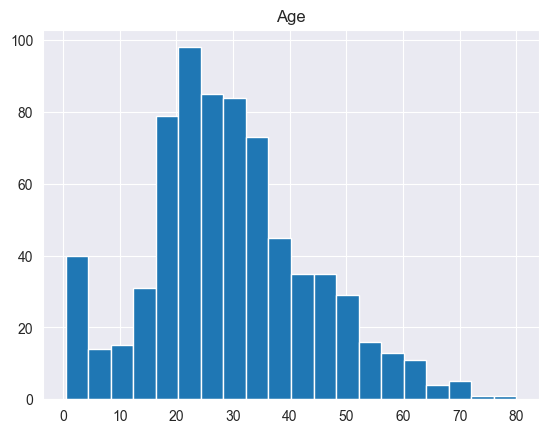

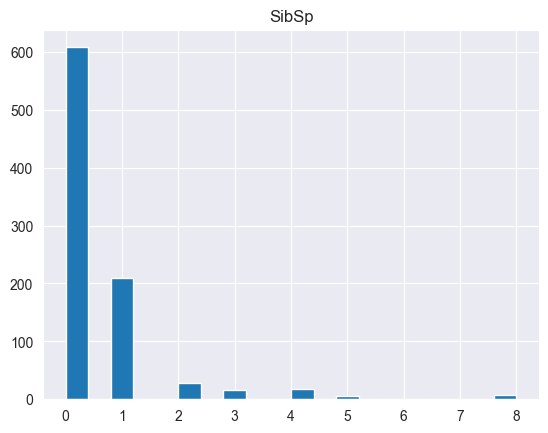

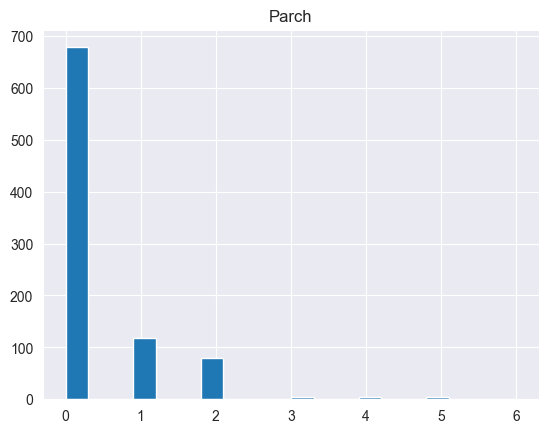

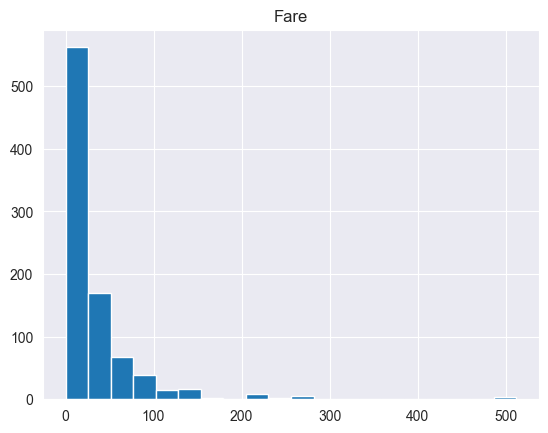

In [39]:
for i in df_num.columns:
    plt.hist(df_num[i], bins=20)
    plt.title(i)
    plt.show()

<AxesSubplot: >

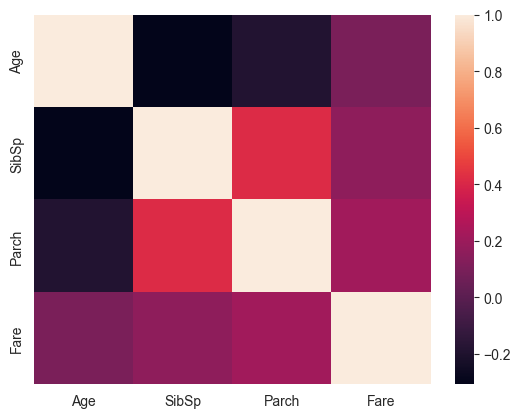

In [40]:
sns.heatmap(df_num.corr())

<AxesSubplot: xlabel='Age', ylabel='Fare'>

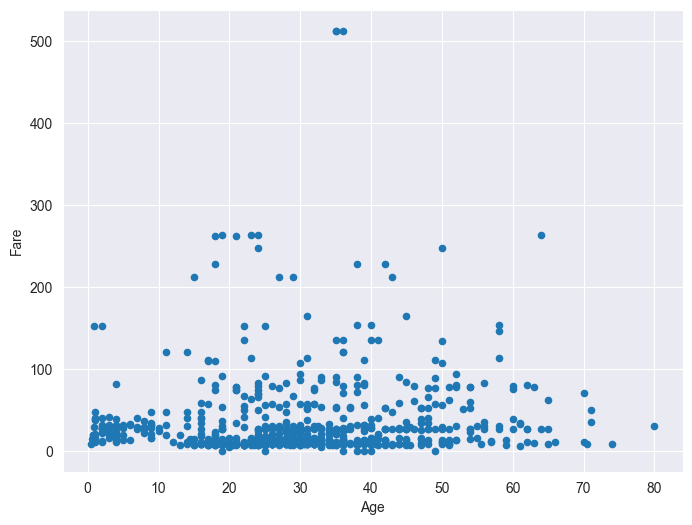

In [11]:
titanic_data.plot.scatter(x='Age', y='Fare', figsize=(8,6))

<AxesSubplot: >

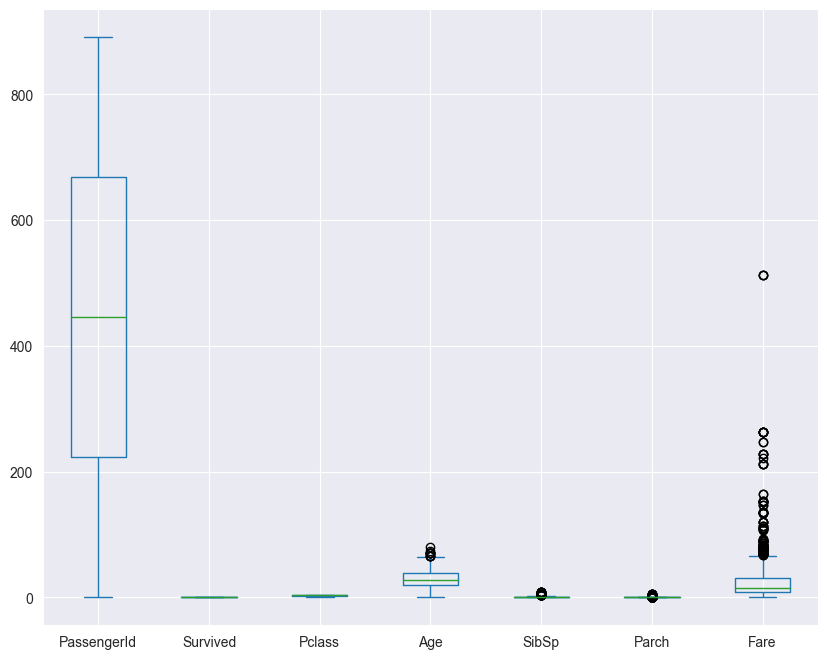

In [29]:
titanic_data.plot.box(figsize=(10,8))

<AxesSubplot: xlabel='Age', ylabel='Fare'>

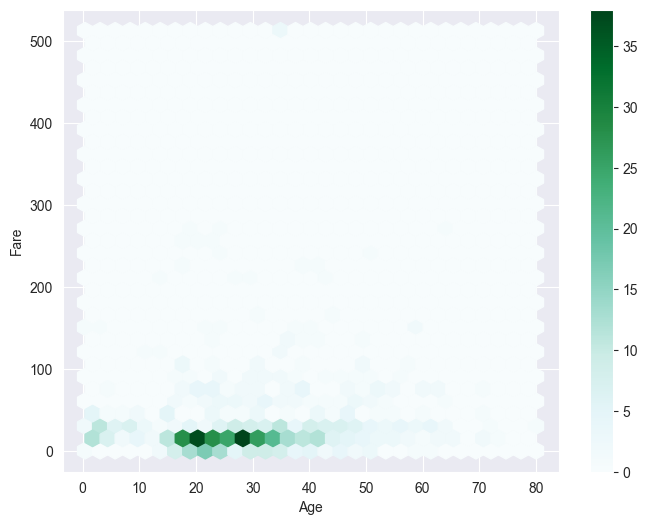

In [19]:
titanic_data.plot.hexbin(x='Age', y='Fare', gridsize=30, figsize=(8,6))

<AxesSubplot: ylabel='Density'>

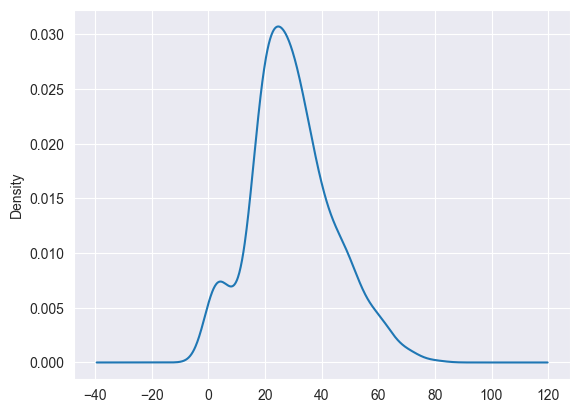

In [21]:
titanic_data['Age'].plot.kde()

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')